In [1]:
import pandas as pd

# ✅ Load dataset (if not already loaded)
df = pd.read_csv('s3://raw-data-714/daily_accidents_with_features.csv')

# ✅ Convert to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# ✅ Sort by time
df = df.sort_values('Start_Time').reset_index(drop=True)

# ✅ Set index
df = df.set_index('Start_Time')

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/fsspec/registry.py:298: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


In [2]:
df.isnull().sum()

accident_count           0
severity_1               0
severity_2               0
severity_3               0
severity_4               0
Temp_avg                 0
Humidity_avg             0
weather_mode             0
traffic_signal_prop      0
city_Atlanta             0
city_Austin              0
city_Baton_Rouge         0
city_Charlotte           0
city_Dallas              0
city_Houston             0
city_Los_Angeles         0
city_Miami               0
city_Nashville           0
city_Raleigh             0
day_of_week              0
is_weekend               0
month                    0
year                     0
accident_count_7d_avg    0
accident_count_7d_std    1
accident_count_lag1      1
dtype: int64

In [3]:
# Fill other columns (forward fill or interpolation)
df = df.bfill()

In [4]:
df.isnull().sum()

accident_count           0
severity_1               0
severity_2               0
severity_3               0
severity_4               0
Temp_avg                 0
Humidity_avg             0
weather_mode             0
traffic_signal_prop      0
city_Atlanta             0
city_Austin              0
city_Baton_Rouge         0
city_Charlotte           0
city_Dallas              0
city_Houston             0
city_Los_Angeles         0
city_Miami               0
city_Nashville           0
city_Raleigh             0
day_of_week              0
is_weekend               0
month                    0
year                     0
accident_count_7d_avg    0
accident_count_7d_std    0
accident_count_lag1      0
dtype: int64

In [5]:
df

,accident_count,severity_1,severity_2,severity_3,severity_4,Temp_avg,Humidity_avg,weather_mode,traffic_signal_prop,city_Atlanta,...,city_Miami,city_Nashville,city_Raleigh,day_of_week,is_weekend,month,year,accident_count_7d_avg,accident_count_7d_std,accident_count_lag1
Start_Time,,,,,,,,,,,,,,,,,,,,,
2016-01-14,7.0,0.0,0,0.0,7,31.000000,69.000000,Fair,0.000000,0,...,0,0,0,3,0,1,2016,7.000000,37.476659,7.0
2016-02-08,60.0,0.0,42,17.0,1,35.239583,91.576389,Overcast,0.194444,0,...,0,0,0,0,0,2,2016,33.500000,37.476659,7.0
2016-02-09,59.0,0.0,33,20.0,6,23.610952,87.034524,Light Snow,0.100000,0,...,0,0,0,1,0,2,2016,42.000000,30.315013,60.0
2016-02-10,49.0,0.0,30,13.0,6,17.410417,78.196970,Light Snow,0.031250,0,...,0,0,0,2,0,2,2016,43.750000,24.998333,59.0
2016-02-11,93.0,0.0,66,21.0,6,15.649187,65.771182,Mostly Cloudy,0.117241,0,...,0,0,0,3,0,2,2016,53.600000,30.883653,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,2202.0,0.0,2115,0.0,87,53.282984,54.709815,Fair,0.065395,88,...,0,0,7,0,0,3,2023,2429.285714,416.237798,1712.0
2023-03-28,2526.0,0.0,2448,0.0,78,50.589264,60.251840,Fair,0.062549,24,...,0,0,3,1,0,3,2023,2394.285714,392.329247,2202.0
2023-03-29,2766.0,0.0,2694,0.0,72,49.160545,66.585384,Fair,0.062545,39,...,0,0,11,2,0,3,2023,2409.428571,406.098452,2526.0


In [6]:
print(df.index.min(), "→", df.index.max())
print(df.columns)
print(df.isnull().sum())

2016-01-14 00:00:00 → 2023-03-31 00:00:00
Index(['accident_count', 'severity_1', 'severity_2', 'severity_3',
       'severity_4', 'Temp_avg', 'Humidity_avg', 'weather_mode',
       'traffic_signal_prop', 'city_Atlanta', 'city_Austin',
       'city_Baton_Rouge', 'city_Charlotte', 'city_Dallas', 'city_Houston',
       'city_Los_Angeles', 'city_Miami', 'city_Nashville', 'city_Raleigh',
       'day_of_week', 'is_weekend', 'month', 'year', 'accident_count_7d_avg',
       'accident_count_7d_std', 'accident_count_lag1'],
      dtype='object')
accident_count           0
severity_1               0
severity_2               0
severity_3               0
severity_4               0
Temp_avg                 0
Humidity_avg             0
weather_mode             0
traffic_signal_prop      0
city_Atlanta             0
city_Austin              0
city_Baton_Rouge         0
city_Charlotte           0
city_Dallas              0
city_Houston             0
city_Los_Angeles         0
city_Miami               0

## Sarimax

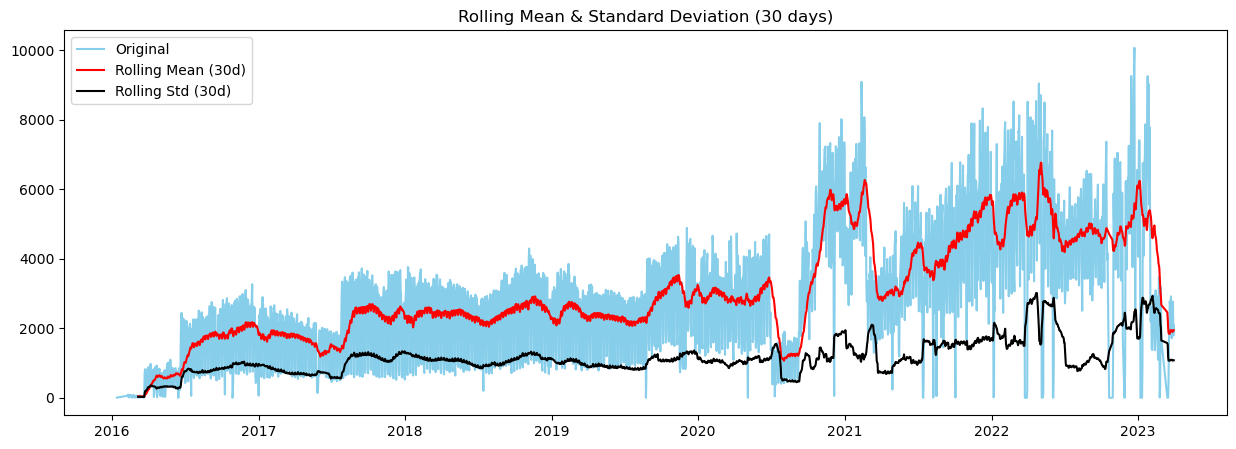

In [7]:
import matplotlib.pyplot as plt

roll_mean = df['accident_count'].rolling(window=30).mean()
roll_std = df['accident_count'].rolling(window=30).std()

plt.figure(figsize=(15, 5))
plt.plot(df['accident_count'], color='skyblue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean (30d)')
plt.plot(roll_std, color='black', label='Rolling Std (30d)')
plt.title('Rolling Mean & Standard Deviation (30 days)')
plt.legend()
plt.show()

🔍 Interpretation:

If mean and std dev vary over time, the series is non-stationary

If they are mostly flat, the series may be stationary

In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['accident_count'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -3.006305327831204
p-value: 0.03430974297313196


✅ Rule of Thumb:

p-value < 0.05 → reject null → stationary ✅

p-value ≥ 0.05 → non-stationary → need differencing or transformation ❌

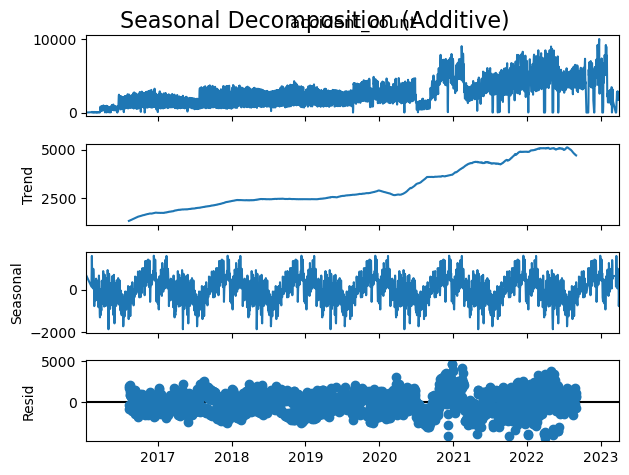

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['accident_count'], model='additive', period=365)
decomposition.plot()
plt.suptitle('Seasonal Decomposition (Additive)', fontsize=16)
plt.show()


In [10]:
# Determine cutoff date (e.g., last 12 months as test)
cutoff_date = '2022-04-01'

# Train-test split
train_df = df.loc[:cutoff_date]
test_df = df.loc[cutoff_date:]

In [11]:
print("Train:", train_df.index.min(), "→", train_df.index.max())
print("Test :", test_df.index.min(), "→", test_df.index.max())

Train: 2016-01-14 00:00:00 → 2022-04-01 00:00:00
Test : 2022-04-01 00:00:00 → 2023-03-31 00:00:00


In [12]:
train_df.head()

,accident_count,severity_1,severity_2,severity_3,severity_4,Temp_avg,Humidity_avg,weather_mode,traffic_signal_prop,city_Atlanta,...,city_Miami,city_Nashville,city_Raleigh,day_of_week,is_weekend,month,year,accident_count_7d_avg,accident_count_7d_std,accident_count_lag1
Start_Time,,,,,,,,,,,,,,,,,,,,,
2016-01-14,7.0,0.0,0,0.0,7,31.000000,69.000000,Fair,0.000000,0,...,0,0,0,3,0,1,2016,7.00,37.476659,7.0
2016-02-08,60.0,0.0,42,17.0,1,35.239583,91.576389,Overcast,0.194444,0,...,0,0,0,0,0,2,2016,33.50,37.476659,7.0
2016-02-09,59.0,0.0,33,20.0,6,23.610952,87.034524,Light Snow,0.100000,0,...,0,0,0,1,0,2,2016,42.00,30.315013,60.0
2016-02-10,49.0,0.0,30,13.0,6,17.410417,78.196970,Light Snow,0.031250,0,...,0,0,0,2,0,2,2016,43.75,24.998333,59.0
2016-02-11,93.0,0.0,66,21.0,6,15.649187,65.771182,Mostly Cloudy,0.117241,0,...,0,0,0,3,0,2,2016,53.60,30.883653,49.0


In [13]:
exog_features = [
    'Temp_avg', 'Humidity_avg', 'weather_mode',
    'traffic_signal_prop',
    'city_Atlanta', 'city_Austin', 'city_Baton_Rouge',
    'city_Charlotte', 'city_Dallas', 'city_Houston',
    'city_Los_Angeles', 'city_Miami', 'city_Nashville',
    'city_Raleigh',
    'day_of_week', 'is_weekend', 'month'
]

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Target
y_train = train_df['accident_count']
y_test = test_df['accident_count']

# Exogenous vars
X_train = train_df[exog_features]
X_test = test_df[exog_features]

In [15]:
print(X_train.dtypes)


Temp_avg               float64
Humidity_avg           float64
weather_mode            object
traffic_signal_prop    float64
city_Atlanta             int64
city_Austin              int64
city_Baton_Rouge         int64
city_Charlotte           int64
city_Dallas              int64
city_Houston             int64
city_Los_Angeles         int64
city_Miami               int64
city_Nashville           int64
city_Raleigh             int64
day_of_week              int64
is_weekend               int64
month                    int64
dtype: object


In [16]:
X_train.head()

,Temp_avg,Humidity_avg,weather_mode,traffic_signal_prop,city_Atlanta,city_Austin,city_Baton_Rouge,city_Charlotte,city_Dallas,city_Houston,city_Los_Angeles,city_Miami,city_Nashville,city_Raleigh,day_of_week,is_weekend,month
Start_Time,,,,,,,,,,,,,,,,,
2016-01-14,31.000000,69.000000,Fair,0.000000,0,0,0,0,0,0,0,0,0,0,3,0,1
2016-02-08,35.239583,91.576389,Overcast,0.194444,0,0,0,0,0,0,0,0,0,0,0,0,2
2016-02-09,23.610952,87.034524,Light Snow,0.100000,0,0,0,0,0,0,0,0,0,0,1,0,2
2016-02-10,17.410417,78.196970,Light Snow,0.031250,0,0,0,0,0,0,0,0,0,0,2,0,2
2016-02-11,15.649187,65.771182,Mostly Cloudy,0.117241,0,0,0,0,0,0,0,0,0,0,3,0,2


In [17]:
# Step 1: Combine train and test features
combined_exog = pd.concat([X_train, X_test])

# Step 2: One-hot encode weather_mode only
combined_exog_encoded = pd.get_dummies(combined_exog, columns=['weather_mode'], drop_first=True)

# Step 3: Split back to X_train and X_test
X_train = combined_exog_encoded.iloc[:len(X_train), :]
X_test = combined_exog_encoded.iloc[len(X_train):, :]


In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2239 entries, 2016-01-14 to 2022-04-01
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Temp_avg                             2239 non-null   float64
 1   Humidity_avg                         2239 non-null   float64
 2   traffic_signal_prop                  2239 non-null   float64
 3   city_Atlanta                         2239 non-null   int64  
 4   city_Austin                          2239 non-null   int64  
 5   city_Baton_Rouge                     2239 non-null   int64  
 6   city_Charlotte                       2239 non-null   int64  
 7   city_Dallas                          2239 non-null   int64  
 8   city_Houston                         2239 non-null   int64  
 9   city_Los_Angeles                     2239 non-null   int64  
 10  city_Miami                           2239 non-null   int64  
 11  city_Nashvil

In [19]:
# Convert bool columns to int
X_train = X_train.astype({col: 'int64' for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: 'int64' for col in X_test.select_dtypes('bool').columns})

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2239 entries, 2016-01-14 to 2022-04-01
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Temp_avg                             2239 non-null   float64
 1   Humidity_avg                         2239 non-null   float64
 2   traffic_signal_prop                  2239 non-null   float64
 3   city_Atlanta                         2239 non-null   int64  
 4   city_Austin                          2239 non-null   int64  
 5   city_Baton_Rouge                     2239 non-null   int64  
 6   city_Charlotte                       2239 non-null   int64  
 7   city_Dallas                          2239 non-null   int64  
 8   city_Houston                         2239 non-null   int64  
 9   city_Los_Angeles                     2239 non-null   int64  
 10  city_Miami                           2239 non-null   int64  
 11  city_Nashvil

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax_model = SARIMAX(
    endog=y_train,
    exog=X_train,
    order=(2, 0, 2),
    seasonal_order=(1, 0, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarimax_result = sarimax_model.fit(disp=False)


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


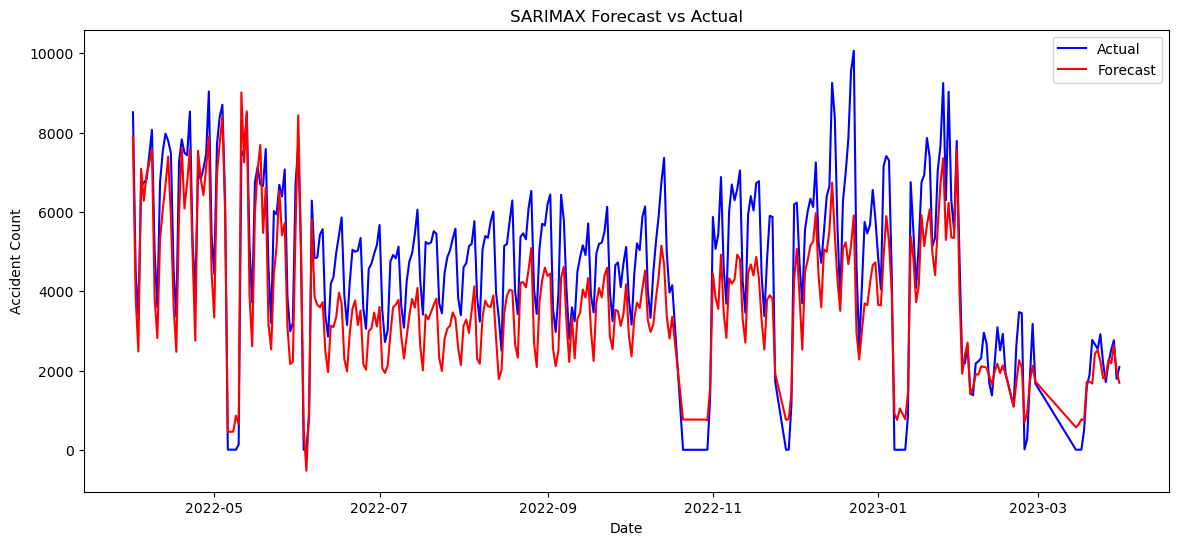

In [22]:
forecast = sarimax_result.predict(
    start=len(y_train),
    end=len(y_train) + len(y_test) - 1,
    exog=X_test
)

# Plot forecast vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, forecast, label='Forecast', color='red')
plt.title('SARIMAX Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Accident Count')
plt.legend()
plt.show()


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, forecast)
mae = mean_absolute_error(y_test, forecast)

print("SARIMAX MSE:", mse)
print("SARIMAX MAE:", mae)


SARIMAX MSE: 1697497.164508736
SARIMAX MAE: 1128.569064639331


 Quick Insight
Given your accident count range (likely in thousands), a MAE of ~1129 might seem high — this suggests:

Daily accident counts vary significantly (i.e., high volatility)

Or SARIMAX alone might not be capturing nonlinear patterns well

➡️ That's where machine learning models like Random Forest and XGBoost will help. They’re better at:

Handling nonlinear effects

Capturing hidden interactions

Reducing residual error

## Random Forest Regressor

In [24]:
target = 'accident_count'

features = [
    # Lag and rolling
    'accident_count_lag1', 'accident_count_7d_avg', 'accident_count_7d_std',
    
    # Weather and traffic
    'Temp_avg', 'Humidity_avg', 'traffic_signal_prop',
    
    # City dummies
    'city_Atlanta', 'city_Austin', 'city_Baton_Rouge', 'city_Charlotte',
    'city_Dallas', 'city_Houston', 'city_Los_Angeles', 'city_Miami',
    'city_Nashville', 'city_Raleigh',
    
    # Time-based
    'day_of_week', 'is_weekend', 'month'
    
    # Note: weather_mode_* dummies can also be added later if needed
]


In [25]:
from sklearn.model_selection import train_test_split

# Already split before:
X = df[features]
y = df[target]

# Keep last 1 year as test set (same cutoff as SARIMAX)
cutoff_date = '2022-04-01'

X_train = X.loc[:cutoff_date]
X_test = X.loc[cutoff_date:]

y_train = y.loc[:cutoff_date]
y_test = y.loc[cutoff_date:]


In [26]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
rf_pred = rf_model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_rf = mean_squared_error(y_test, rf_pred)
mae_rf = mean_absolute_error(y_test, rf_pred)

print("Random Forest MSE:", mse_rf)
print("Random Forest MAE:", mae_rf)

Random Forest MSE: 874504.7346441882
Random Forest MAE: 764.6146329031161


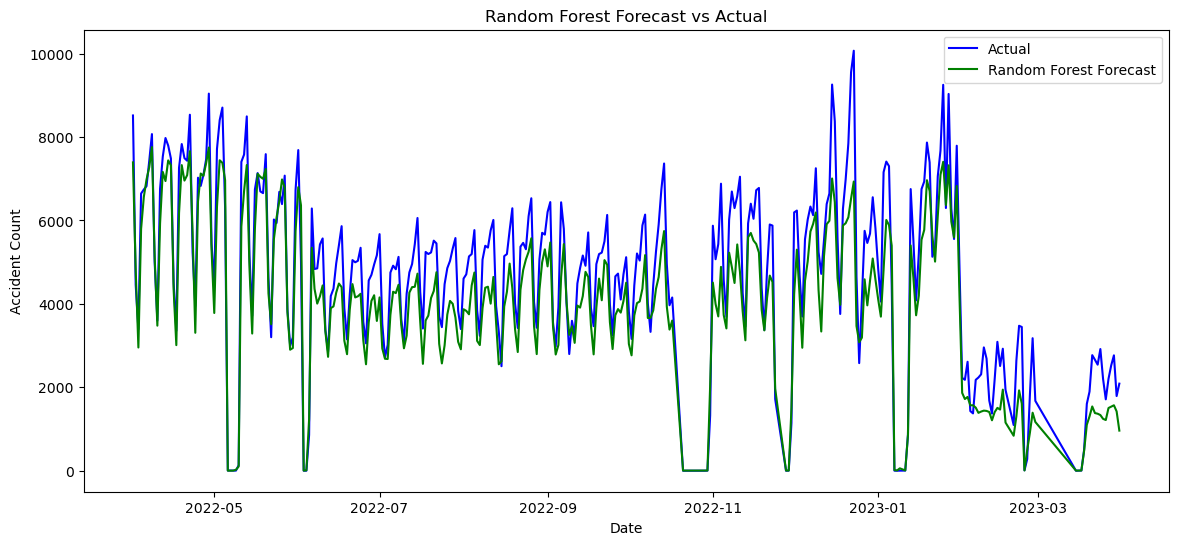

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, rf_pred, label='Random Forest Forecast', color='green')
plt.title('Random Forest Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Accident Count')
plt.legend()
plt.show()


In [29]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances * 100
}).sort_values(by='Importance', ascending=False, ignore_index = True)

print(feature_importance_df)


                  Feature  Importance
0              city_Miami   45.500723
1          city_Nashville   27.234124
2          city_Charlotte    9.796814
3   accident_count_7d_avg    3.749099
4        city_Los_Angeles    3.467606
5        city_Baton_Rouge    3.330075
6     accident_count_lag1    1.860714
7   accident_count_7d_std    0.844234
8            city_Houston    0.799309
9            city_Raleigh    0.748283
10            city_Austin    0.601790
11            city_Dallas    0.417114
12    traffic_signal_prop    0.309944
13            day_of_week    0.282543
14               Temp_avg    0.268003
15           city_Atlanta    0.226294
16                  month    0.207896
17           Humidity_avg    0.190358
18             is_weekend    0.165075


## XGBoost

In [30]:
!pip install xgboost

In [31]:
import xgboost as xgb

# Feature matrix and target
X = df[features]
y = df[target]

# Train-test split using same cutoff
cutoff_date = '2022-04-01'
X_train = X.loc[:cutoff_date]
X_test = X.loc[cutoff_date:]
y_train = y.loc[:cutoff_date]
y_test = y.loc[cutoff_date:]


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [32]:
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    objective='reg:squarederror',
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [33]:
xgb_pred = xgb_model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_xgb = mean_squared_error(y_test, xgb_pred)
mae_xgb = mean_absolute_error(y_test, xgb_pred)

print("XGBoost MSE:", mse_xgb)
print("XGBoost MAE:", mae_xgb)


XGBoost MSE: 794685.2591556903
XGBoost MAE: 720.8530846377333


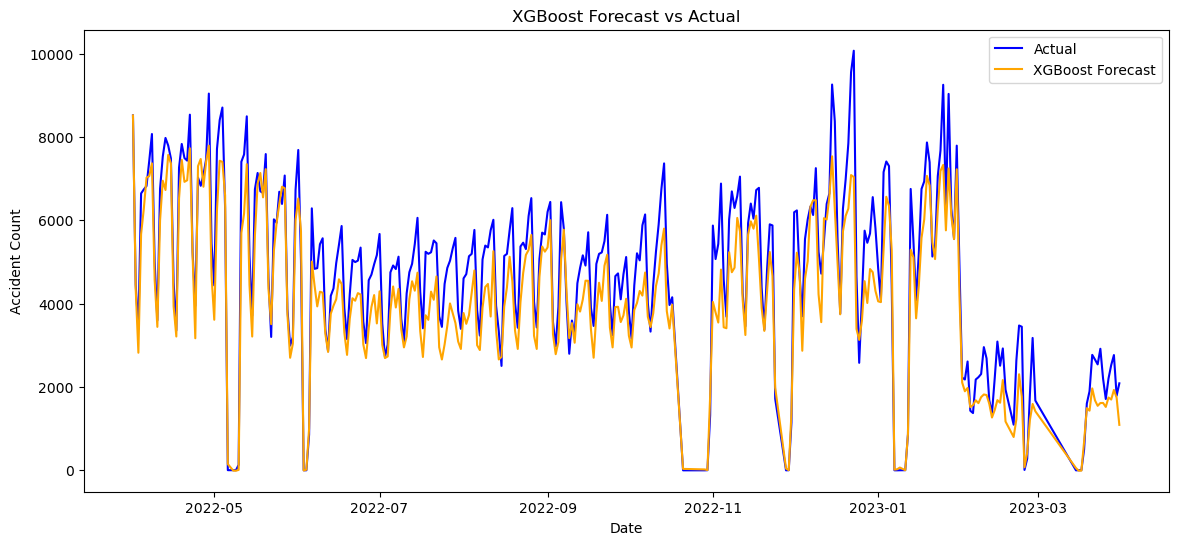

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, xgb_pred, label='XGBoost Forecast', color='orange')
plt.title('XGBoost Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Accident Count')
plt.legend()
plt.show()


In [35]:
xgb_importance = xgb_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_importance * 100
}).sort_values(by='Importance', ascending=False, ignore_index = True)

print(importance_df)


                  Feature  Importance
0              city_Miami   44.392082
1          city_Nashville   28.236357
2          city_Charlotte    9.244874
3        city_Baton_Rouge    6.988570
4        city_Los_Angeles    2.415875
5   accident_count_7d_avg    1.845587
6             day_of_week    1.397654
7            city_Raleigh    1.058302
8             city_Austin    0.904739
9              is_weekend    0.773165
10           city_Houston    0.579506
11            city_Dallas    0.466527
12    accident_count_lag1    0.383979
13  accident_count_7d_std    0.343931
14                  month    0.303448
15           city_Atlanta    0.303434
16               Temp_avg    0.128391
17    traffic_signal_prop    0.122887
18           Humidity_avg    0.110698


In [36]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

tscv = TimeSeriesSplit(n_splits=5)

X = df[features].values
y = df[target].values


In [37]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_list = []
mae_list = []

for train_idx, val_idx in tscv.split(X):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    model = XGBRegressor(
        n_estimators=200,
        max_depth=10,
        learning_rate=0.1,
        objective='reg:squarederror',
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    )
    
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    
    mse = mean_squared_error(y_val, preds)
    mae = mean_absolute_error(y_val, preds)
    
    mse_list.append(mse)
    mae_list.append(mae)

# Average CV results
print(f"Cross-Validated MSE: {np.mean(mse_list):.2f}")
print(f"Cross-Validated MAE: {np.mean(mae_list):.2f}")


Cross-Validated MSE: 633442.46
Cross-Validated MAE: 595.62


🔍 Interpretation:

Model is stable across different time periods

No overfitting detected

You've now validated the model's ability to generalize to unseen future data

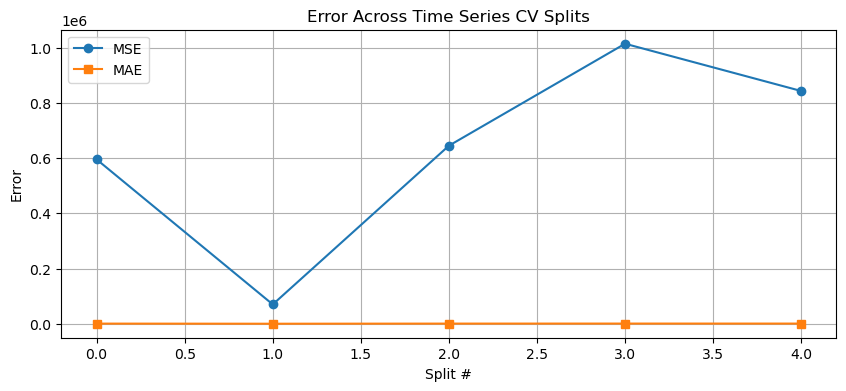

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(mse_list, marker='o', label='MSE')
plt.plot(mae_list, marker='s', label='MAE')
plt.title('Error Across Time Series CV Splits')
plt.xlabel('Split #')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()


# SARIMAX: Creating CSV for Dashboard

In [ ]:
# =========================
# SARIMAX: Actuals till 2021, Forecast full range (2016–2023) — WIDE ONLY
# =========================
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

SEVERITY_COLS = ["severity_1", "severity_2", "severity_3", "severity_4"]
ACTUALS_END = "2021-12-31"
actuals_end_dt = pd.to_datetime(ACTUALS_END)

# ---- Rebuild exogenous exactly as in RF (if not already available) ----
# Feature columns = everything EXCEPT Date, accident_count, and ALL severities (avoid leakage)
feature_cols = [c for c in df.columns if c not in ["Date", "accident_count"] + SEVERITY_COLS]

# One-hot any categoricals & make fully numeric float
cat_cols = df[feature_cols].select_dtypes(include=["object","category"]).columns.tolist()
X_all = pd.get_dummies(df[feature_cols], columns=cat_cols, drop_first=False).fillna(0.0)
X_all = X_all.apply(pd.to_numeric, errors="coerce").fillna(0.0).astype("float64")

# Masks & sizes
train_mask = df["Date"] <= actuals_end_dt
n_train = int(train_mask.sum())
n_total = len(df)
n_test = n_total - n_train

exog_train = X_all.loc[train_mask]
exog_oos   = X_all.loc[~train_mask]  # ONLY out-of-sample rows for 2022–2023

# Sanity checks
assert exog_train.shape[0] == n_train, "exog_train rows must equal n_train"
assert exog_oos.shape[0]   == n_test,  "exog_oos rows must equal n_test"

sarimax_full_preds = {}

for sev in SEVERITY_COLS:
    print(f"Fitting SARIMAX for {sev} ...")

    # Endogenous (target) numeric series
    endog_full  = pd.to_numeric(df[sev], errors="coerce").astype("float64")
    endog_train = endog_full.loc[train_mask].fillna(0.0)

    # Model (start simple; adjust orders if needed)
    model = SARIMAX(
        endog=endog_train,
        exog=exog_train,
        order=(1, 0, 1),
        seasonal_order=(1, 0, 1, 7),  # weekly seasonality for daily data
        trend="c",
        enforce_stationarity=False,
        enforce_invertibility=False,
    )
    res = model.fit(disp=False, maxiter=300)

    # In-sample fitted values (2016–2021)
    insamp = res.get_prediction(start=0, end=n_train-1).predicted_mean

    # Out-of-sample forecast (2022–2023) — must pass ONLY OOS exog
    if n_test > 0:
        oos = res.get_forecast(steps=n_test, exog=exog_oos).predicted_mean
        full_pred = pd.concat([insamp, oos], ignore_index=True)
    else:
        full_pred = insamp.copy()

    # Align to df index
    sarimax_full_preds[sev] = pd.Series(full_pred.values, index=df.index, dtype="float64")

# =========================
# Export WIDE (Actual + Forecast)
# =========================
sarimax_out = pd.DataFrame({"Date": df["Date"].dt.strftime("%Y-%m-%d")})
for sev in SEVERITY_COLS:
    # Actuals ONLY up to 2021-12-31
    sarimax_out[f"{sev}_actual"]   = np.where(df["Date"] <= actuals_end_dt, df[sev], np.nan)
    # Forecast for FULL range (2016–2023): fitted (2016–2021) + forecast (2022–2023)
    sarimax_out[f"{sev}_forecast"] = sarimax_full_preds[sev].values

# Ensure numeric measures for QuickSight
for c in sarimax_out.columns:
    if c != "Date":
        sarimax_out[c] = pd.to_numeric(sarimax_out[c], errors="coerce")

sarimax_out.to_csv("sarimax_severity_actual_forecast.csv", index=False)
print("Saved sarimax_severity_actual_forecast.csv | rows:", len(sarimax_out))


# Random Forest: Creating CSV file for the Dashboard

In [ ]:
import pandas as pd
import numpy as np

# =========================
# Config
# =========================
DATA_PATH = "s3://raw-data-714/daily_accidents_with_features.csv"
SEVERITY_COLS = ["severity_1", "severity_2", "severity_3", "severity_4"]
ACTUALS_END = "2021-12-31"          # actuals until this date (inclusive)
ROUND_FORECAST_TO_INT = True        # set False to keep decimals

# =========================
# Imports
# =========================
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# =========================
# Load & prep
# =========================
df = pd.read_csv(DATA_PATH)
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")
df = df.sort_values("Start_Time").reset_index(drop=True).rename(columns={"Start_Time":"Date"})

# sanity
missing = [c for c in SEVERITY_COLS if c not in df.columns]
if missing:
    raise ValueError(f"Missing severity columns: {missing}")

actuals_end_dt = pd.to_datetime(ACTUALS_END)
actual_mask = df["Date"] <= actuals_end_dt

# Features: everything except Date, accident_count, and targets
feature_cols = [c for c in df.columns if c not in ["Date", "accident_count"] + SEVERITY_COLS]

# one‑hot categoricals
cat_cols = df[feature_cols].select_dtypes(include=["object","category"]).columns.tolist()
X_all = pd.get_dummies(df[feature_cols], columns=cat_cols, drop_first=False).fillna(0)

# =========================
# RF per severity
# =========================
rf_preds_full = {}   # predictions for ALL dates
for sev in SEVERITY_COLS:
    X_train = X_all.loc[actual_mask]
    y_train = df.loc[actual_mask, sev].fillna(0)

    rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    # Predict for the ENTIRE range (2016–2023)
    y_hat_all = pd.Series(rf.predict(X_all), index=df.index, dtype=float)
    if ROUND_FORECAST_TO_INT:
        y_hat_all = y_hat_all.round()

    rf_preds_full[sev] = y_hat_all

# =========================
# Export WIDE
# =========================
rf_out = pd.DataFrame({"Date": df["Date"].dt.strftime("%Y-%m-%d")})
for sev in SEVERITY_COLS:
    # Actuals only until 2021-12-31
    rf_out[f"{sev}_actual"]   = np.where(df["Date"] <= actuals_end_dt, df[sev], np.nan)
    # Forecasts for ALL dates (2016–2023)
    rf_out[f"{sev}_forecast"] = rf_preds_full[sev].values

# ensure numeric for QS
for c in rf_out.columns:
    if c != "Date":
        rf_out[c] = pd.to_numeric(rf_out[c], errors="coerce")

rf_out.to_csv("rf_severity_actual_forecast.csv", index=False)
print("Saved WIDE: rf_severity_actual_forecast.csv | rows:", len(rf_out))

# =========================
# Export LONG (recommended)
# Date | Severity | Type | Value
# =========================
long_frames = []
for sev in SEVERITY_COLS:
    # Actual (only till 2021-12-31)
    m = df["Date"] <= actuals_end_dt
    long_frames.append(pd.DataFrame({
        "Date": df.loc[m, "Date"].dt.strftime("%Y-%m-%d"),
        "Severity": sev,
        "Type": "Actual",
        "Value": df.loc[m, sev].values
    }))
    # Forecast (ALL dates)
    long_frames.append(pd.DataFrame({
        "Date": df["Date"].dt.strftime("%Y-%m-%d"),
        "Severity": sev,
        "Type": "Forecast",
        "Value": rf_preds_full[sev].values
    }))

rf_long = pd.concat(long_frames, ignore_index=True)
rf_long["Value"] = pd.to_numeric(rf_long["Value"], errors="coerce")
rf_long.to_csv("rf_severity_long.csv", index=False)
print("Saved LONG: rf_severity_long.csv | rows:", len(rf_long))


# XGboost: Creating CSV file for Dashboard

In [ ]:
# =========================
# XGBoost: Actuals till 2021, Forecast full range (2016–2023) — WIDE ONLY
# =========================
import pandas as pd
import numpy as np

# Install xgboost if missing
try:
    from xgboost import XGBRegressor
except Exception:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "xgboost"])
    from xgboost import XGBRegressor

# -------- CONFIG --------
DATA_PATH = "s3://raw-data-714/daily_accidents_with_features.csv"  # or local path
SEVERITY_COLS = ["severity_1", "severity_2", "severity_3", "severity_4"]
ACTUALS_END = "2021-12-31"   # Actuals until this date (inclusive)
SAVE_PATH = "xgb_severity_actual_forecast.csv"

# -------- LOAD & PREP --------
df = pd.read_csv(DATA_PATH)
# Ensure datetime
date_col = "Start_Time" if "Start_Time" in df.columns else "Date"
df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
df = df.sort_values(date_col).reset_index(drop=True).rename(columns={date_col: "Date"})

# Sanity: have severity columns
missing = [c for c in SEVERITY_COLS if c not in df.columns]
if missing:
    raise ValueError(f"Missing severity columns: {missing}")

actuals_end_dt = pd.to_datetime(ACTUALS_END)
train_mask = df["Date"] <= actuals_end_dt

# -------- FEATURES (no leakage) --------
# Exclude Date, total count, and all severities from features
feature_cols = [c for c in df.columns if c not in ["Date", "accident_count"] + SEVERITY_COLS]

# One-hot encode categoricals; force numeric; fill NaNs
cat_cols = df[feature_cols].select_dtypes(include=["object", "category"]).columns.tolist()
X_all = pd.get_dummies(df[feature_cols], columns=cat_cols, drop_first=False)
X_all = X_all.apply(pd.to_numeric, errors="coerce").fillna(0.0).astype("float64")

# Optional tiny validation slice at end of train for monitoring (compatible with older XGB)
valid_tail_days = 28
train_idx = np.where(train_mask)[0]
if len(train_idx) > valid_tail_days * 2:
    split_at = train_idx[-valid_tail_days]
    is_train_core = np.zeros(len(df), dtype=bool)
    is_valid = np.zeros(len(df), dtype=bool)
    is_train_core[train_idx[0]:split_at] = True
    is_valid[split_at:train_idx[-1] + 1] = True
else:
    # If training set is small, skip explicit validation
    is_train_core = train_mask.values
    is_valid = np.zeros(len(df), dtype=bool)

# -------- TRAIN & PREDICT PER SEVERITY --------
xgb_preds_full = {}

for sev in SEVERITY_COLS:
    print(f"Training XGBoost for {sev} ...")
    y_all = pd.to_numeric(df[sev], errors="coerce").astype("float64").fillna(0.0)

    X_tr = X_all[is_train_core]
    y_tr = y_all[is_train_core]
    X_va = X_all[is_valid]
    y_va = y_all[is_valid]

    model = XGBRegressor(
        objective="reg:squarederror",
        n_estimators=600,       # conservative since no early stopping
        learning_rate=0.06,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_tr, y_tr)

    # Predict for the FULL range (2016–2023)
    y_hat_all = model.predict(X_all)
    xgb_preds_full[sev] = pd.Series(y_hat_all, index=df.index, dtype="float64")

# -------- EXPORT WIDE (Actual + Forecast) --------
out = pd.DataFrame({"Date": df["Date"].dt.strftime("%Y-%m-%d")})
for sev in SEVERITY_COLS:
    # Actuals ONLY up to 2021-12-31
    out[f"{sev}_actual"]   = np.where(df["Date"] <= actuals_end_dt, df[sev], np.nan)
    # Forecasts for FULL range (2016–2023)
    out[f"{sev}_forecast"] = xgb_preds_full[sev].values

# Ensure numeric measures for BI tools
for c in out.columns:
    if c != "Date":
        out[c] = pd.to_numeric(out[c], errors="coerce")

out.to_csv(SAVE_PATH, index=False)
print(f"Saved {SAVE_PATH} | rows: {len(out)}")
out.head(10)
